In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv('/content/KaggleV2-May-2016.csv.zip')

In [13]:
# first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# Data type
df.dtypes

,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [18]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [19]:
# Basic statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [20]:
# Drop irrelevant columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [21]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
# Convert date columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [24]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
# Create new column: waiting days
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [26]:
# Remove negative waiting days
df = df[df['WaitingDays'] >= 0]


In [27]:
# Convert 'No-show' to binary
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

<ipython-input-27-1043160344>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})


In [28]:
# Extract day of week
df['AppointmentWeekDay'] = df['AppointmentDay'].dt.day_name()
df['ScheduledWeekDay'] = df['ScheduledDay'].dt.day_name()

# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Neighbourhood', 'AppointmentWeekDay'], drop_first=True)


<ipython-input-28-4186055488>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AppointmentWeekDay'] = df['AppointmentDay'].dt.day_name()
<ipython-input-28-4186055488>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ScheduledWeekDay'] = df['ScheduledDay'].dt.day_name()


In [29]:
df.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,...,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,AppointmentWeekDay_Monday,AppointmentWeekDay_Saturday,AppointmentWeekDay_Thursday,AppointmentWeekDay_Tuesday,AppointmentWeekDay_Wednesday
5,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
7,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
9,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
10,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


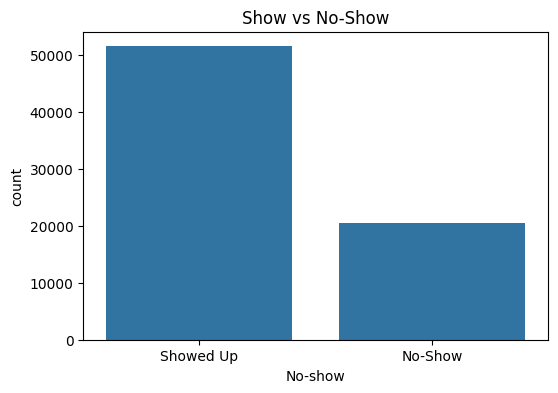

In [30]:
# 6. Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='No-show', data=df)
plt.title("Show vs No-Show")
plt.xticks([0,1], ['Showed Up', 'No-Show'])
plt.show()

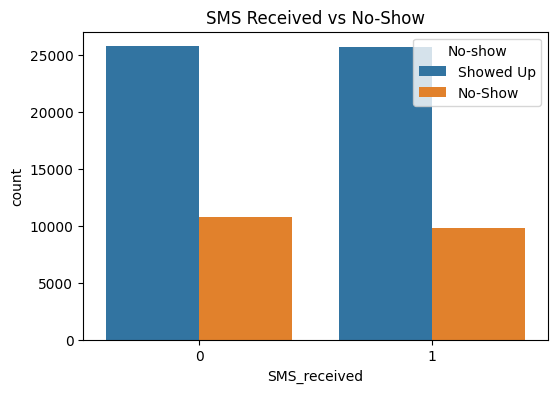

In [31]:
# SMS effect
plt.figure(figsize=(6,4))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title("SMS Received vs No-Show")
plt.legend(title='No-show', labels=['Showed Up', 'No-Show'])
plt.show()

 **Age Distribution**

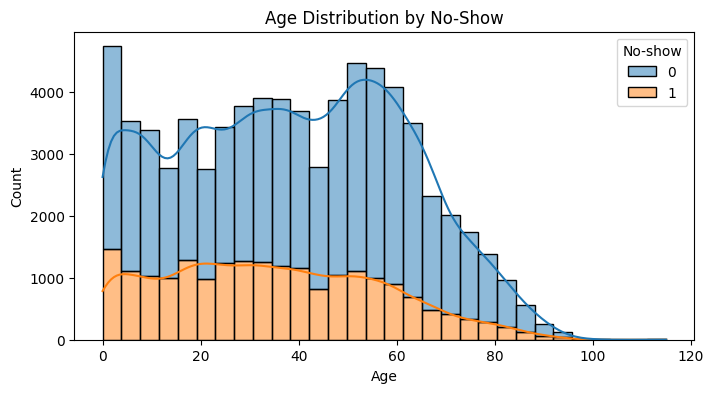

In [32]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', hue='No-show', bins=30, kde=True, multiple='stack')
plt.title("Age Distribution by No-Show")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**No-Show by Gender**

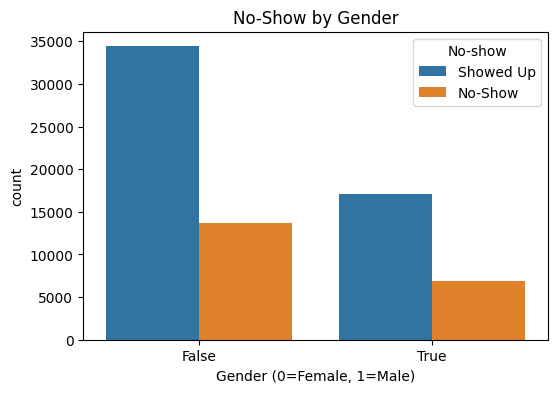

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender_M', hue='No-show', data=df)
plt.title("No-Show by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.legend(title="No-show", labels=["Showed Up", "No-Show"])
plt.show()